# executorlib

## Define workflow with executorlib

In [1]:
from executorlib import SingleNodeExecutor, get_item_from_future

In [2]:
from workflow import get_sum, get_prod_and_div, get_square

In [3]:
workflow_json_filename = "executorlib_arithmetic.json"

In [4]:
with SingleNodeExecutor(export_workflow_filename=workflow_json_filename) as exe:
    future_prod_and_div = exe.submit(get_prod_and_div, x=1, y=2)
    future_prod = get_item_from_future(future_prod_and_div, key="prod")
    future_div = get_item_from_future(future_prod_and_div, key="div")
    future_sum = exe.submit(get_sum, x=future_prod, y=future_div)
    future_result = exe.submit(get_square, x=future_sum)

In [5]:
!cat {workflow_json_filename}

{
    "version": "0.1.0",
    "nodes": [
        {
            "id": 0,
            "type": "function",
            "value": "workflow.get_prod_and_div"
        },
        {
            "id": 1,
            "type": "function",
            "value": "workflow.get_sum"
        },
        {
            "id": 2,
            "type": "function",
            "value": "workflow.get_square"
        },
        {
            "id": 3,
            "type": "input",
            "value": 1,
            "name": "x"
        },
        {
            "id": 4,
            "type": "input",
            "value": 2,
            "name": "y"
        },
        {
            "id": 5,
            "type": "output",
            "name": "result"
        }
    ],
    "edges": [
        {
            "target": 0,
            "targetPort": "x",
            "source": 3,
            "sourcePort": null
        },
        {
            "target": 0,
            "targetPort": "y",
            "source": 4,
            "sourcePo

## Load Workflow with aiida

In [6]:
from aiida import load_profile

load_profile()

Profile<uuid='c08748df7ab74ec08c14e5f16cebc987' name='pwd'>

In [7]:
from python_workflow_definition.aiida import load_workflow_json

In [8]:
wg = load_workflow_json(file_name=workflow_json_filename)
wg

In [9]:
wg.run()

01/16/2026 08:08:17 AM <39822> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1573|WorkGraphEngine|continue_workgraph]: tasks ready to run: get_prod_and_div
01/16/2026 08:08:17 AM <39822> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1573|WorkGraphEngine|update_task_state]: Task: get_prod_and_div, type: PYFUNCTION, finished.
01/16/2026 08:08:17 AM <39822> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1573|WorkGraphEngine|continue_workgraph]: tasks ready to run: get_sum
01/16/2026 08:08:18 AM <39822> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1573|WorkGraphEngine|update_task_state]: Task: get_sum, type: PYFUNCTION, finished.
01/16/2026 08:08:18 AM <39822> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1573|WorkGraphEngine|continue_workgraph]: tasks ready to run: get_square
01/16/2026 08:08:18 AM <39822> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1573|Wo

{}

## Load Workflow with jobflow

In [10]:
from python_workflow_definition.jobflow import load_workflow_json

In [11]:
from jobflow.managers.local import run_locally

In [12]:
flow = load_workflow_json(file_name=workflow_json_filename)

In [13]:
result = run_locally(flow)
result

2026-01-16 08:08:27,788 INFO Started executing jobs locally
2026-01-16 08:08:28,329 INFO Starting job - get_prod_and_div (548e497c-81af-44a2-a626-cd9466984398)
2026-01-16 08:08:28,332 INFO Finished job - get_prod_and_div (548e497c-81af-44a2-a626-cd9466984398)
2026-01-16 08:08:28,333 INFO Starting job - get_sum (c4ce346f-059c-4cb1-8e98-c7f4f0df837e)
2026-01-16 08:08:28,335 INFO Finished job - get_sum (c4ce346f-059c-4cb1-8e98-c7f4f0df837e)
2026-01-16 08:08:28,336 INFO Starting job - get_square (e94efcd4-8074-48b1-865c-0e614fc9c846)
2026-01-16 08:08:28,339 INFO Finished job - get_square (e94efcd4-8074-48b1-865c-0e614fc9c846)
2026-01-16 08:08:28,340 INFO Finished executing jobs locally


{'548e497c-81af-44a2-a626-cd9466984398': {1: Response(output={'prod': 2, 'div': 0.5}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jan/notebooks/2026/2026-01-16-executorlib-pwd/arithmetic'))},
 'c4ce346f-059c-4cb1-8e98-c7f4f0df837e': {1: Response(output=2.5, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jan/notebooks/2026/2026-01-16-executorlib-pwd/arithmetic'))},
 'e94efcd4-8074-48b1-865c-0e614fc9c846': {1: Response(output=6.25, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jan/notebooks/2026/2026-01-16-executorlib-pwd/arithmetic'))}}

## Load Workflow with pyiron_base

In [14]:
from python_workflow_definition.pyiron_base import load_workflow_json

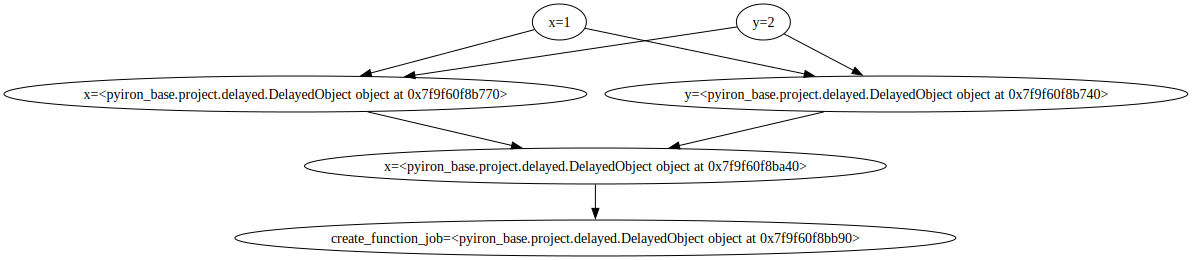

In [15]:
delayed_object_lst = load_workflow_json(file_name=workflow_json_filename)
delayed_object_lst[-1].draw()

In [16]:
delayed_object_lst[-1].pull()

The job get_prod_and_div_00cf2c787390eacfbc4a51e9a0c38ec7 was saved and received the ID: 31
The job get_sum_4b5b9d16b259a13b6a32798ce2779af8 was saved and received the ID: 32
The job get_square_9cc2f0545498916d7720c59c1120a66d was saved and received the ID: 33


6.25

## Load Workflow with pyiron_workflow

In [17]:
from python_workflow_definition.pyiron_workflow import load_workflow_json

In [18]:
wf = load_workflow_json(file_name=workflow_json_filename)

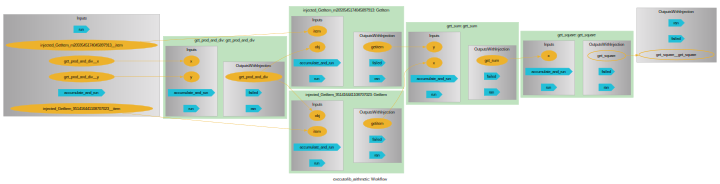

In [19]:
wf.draw(size=(10,10))

In [20]:
wf.run()

{'get_square__get_square': 6.25}